In [262]:
import string
alphabet = list(string.ascii_lowercase)
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.animation as animation

In [263]:
elevation = []
start = ()
end = ()
with open("12th.txt", "r") as file:
    for i, line in enumerate(file):
      l = line.strip()
      if "S" in l:
        start = (i, l.index("S"))
      if "E" in l:
        end = (i, l.index("E"))

      aa = [alphabet.index(a) for a in list(l.replace("S", "a").replace("E", "z"))]
      elevation.append(aa)
elevation = np.array(elevation)

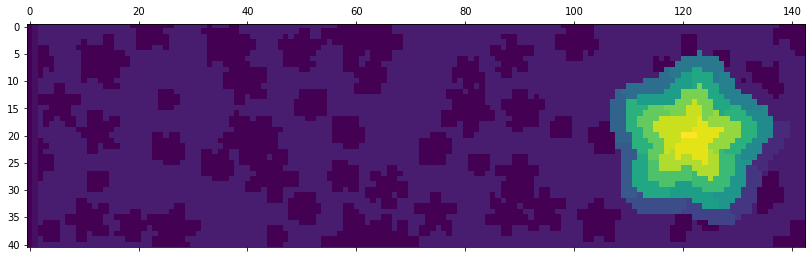

In [264]:
plt.matshow(elevation)

In [265]:
start

(20, 0)

In [266]:
yy, xx = np.mgrid[0:elevation.shape[0], 0:elevation.shape[1]]
ref = xx+yy
ref

array([[  0,   1,   2, ..., 140, 141, 142],
       [  1,   2,   3, ..., 141, 142, 143],
       [  2,   3,   4, ..., 142, 143, 144],
       ...,
       [ 38,  39,  40, ..., 178, 179, 180],
       [ 39,  40,  41, ..., 179, 180, 181],
       [ 40,  41,  42, ..., 180, 181, 182]])

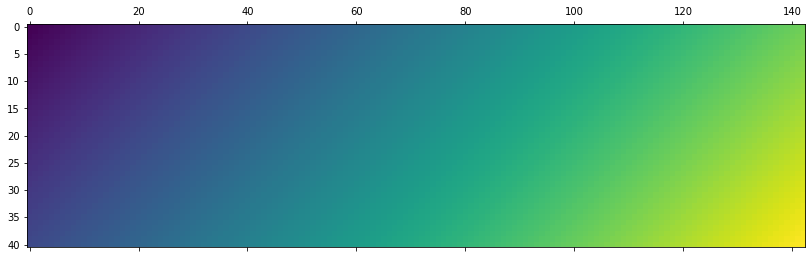

In [267]:
plt.matshow(ref)

In [268]:
min_steps = np.ones(ref.shape)*99999999999
min_steps[start] = 0

In [269]:
7-5

2

In [270]:

d = 0
tot = 0
while d < ref.max()+1:
  min_steps  = min_steps.astype(int)
  tot+=1
  if tot>3000:
    break
  i_s = yy[ref==d]
  j_s = xx[ref==d]
  #print(i_s, j_s)
  for i, j in zip(i_s, j_s):
    # forward step
    if i+1 in list(range(elevation.shape[0])):
      if (elevation[i+1, j] - elevation[i, j] < 2):
        if (min_steps[i+1, j] > min_steps[i, j]+1):
          min_steps[i+1, j] = min_steps[i, j]+1
    if j+1 in list(range(elevation.shape[1])):
      if elevation[i, j+1] - elevation[i, j] < 2:
        if (min_steps[i, j+1] > min_steps[i, j]+1):
          min_steps[i, j+1] = min_steps[i, j]+1

  backwards_necessary = False      
  for i, j in zip(i_s, j_s):
    if i-1 in list(range(elevation.shape[0])):
      if elevation[i-1, j] - elevation[i, j] < 2:
        if (min_steps[i-1, j] > min_steps[i, j]+1):
          min_steps[i-1, j] = min_steps[i, j]+1
          backwards_necessary = True
        
    if j-1 in list(range(elevation.shape[1])):
      if elevation[i, j-1] - elevation[i, j] < 2:
        if (min_steps[i, j-1] > min_steps[i, j]+1):
          min_steps[i, j-1] = min_steps[i, j]+1
#        pass
 #       min_steps[i, j-1] = w
          backwards_necessary = True        
  #print(backwards_necessary, d)
  if backwards_necessary:
    d -= 1
  else:
    d += 1
print("total iterations", tot, d, ref.max()+1)
print("final: ", min_steps[end])

total iterations 1391 183 183
final:  462


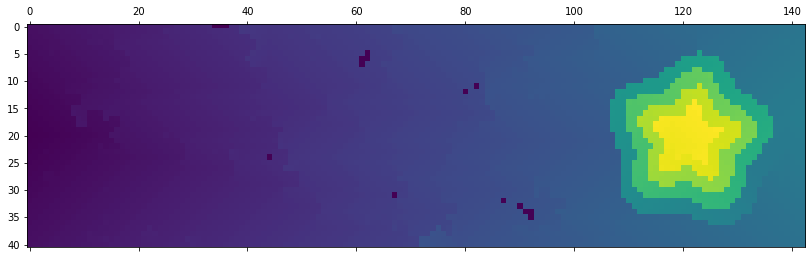

In [271]:
aa = min_steps.copy()
aa[aa==99999999999] = 0
plt.matshow(aa)

# solution2

In [326]:
elevation = []
start = ()
end = ()
with open("12th.txt", "r") as file:
    for i, line in enumerate(file):
      l = line.strip()
      if "S" in l:
        start = (i, l.index("S"))
      if "E" in l:
        end = (i, l.index("E"))

      aa = [alphabet.index(a) for a in list(l.replace("S", "a").replace("E", "z"))]
      elevation.append(aa)
elevation = np.array(elevation)

yy, xx = np.mgrid[0:elevation.shape[0], 0:elevation.shape[1]]
ref = xx+yy
ref

array([[  0,   1,   2, ..., 140, 141, 142],
       [  1,   2,   3, ..., 141, 142, 143],
       [  2,   3,   4, ..., 142, 143, 144],
       ...,
       [ 38,  39,  40, ..., 178, 179, 180],
       [ 39,  40,  41, ..., 179, 180, 181],
       [ 40,  41,  42, ..., 180, 181, 182]])

In [327]:
# walk down

In [330]:
min_steps = np.ones(ref.shape)*99999999999
min_steps[end] = 0
d = 0
tot = 0
while d < ref.max()+1:
  min_steps  = min_steps.astype(int)
  tot+=1
  if tot>5000:
    break
  i_s = yy[ref==d]
  j_s = xx[ref==d]
  #print(i_s, j_s)
  for i, j in zip(i_s, j_s):
    # forward step
    if i+1 in list(range(elevation.shape[0])):
      if (elevation[i, j] - elevation[i+1, j] < 2):
        if (min_steps[i+1, j] > min_steps[i, j]+1):
          min_steps[i+1, j] = min_steps[i, j]+1
    if j+1 in list(range(elevation.shape[1])):
      if elevation[i, j] - elevation[i, j+1] < 2:
        if (min_steps[i, j+1] > min_steps[i, j]+1):
          min_steps[i, j+1] = min_steps[i, j]+1

  backwards_necessary = False      
  for i, j in zip(i_s, j_s):
    if i-1 in list(range(elevation.shape[0])):
      if elevation[i, j] - elevation[i-1, j] < 2:
        if (min_steps[i-1, j] > min_steps[i, j]+1):
          min_steps[i-1, j] = min_steps[i, j]+1
          backwards_necessary = True
        
    if j-1 in list(range(elevation.shape[1])):
      if elevation[i, j] - elevation[i, j-1] < 2:
        if (min_steps[i, j-1] > min_steps[i, j]+1):
          min_steps[i, j-1] = min_steps[i, j]+1
#        pass
 #       min_steps[i, j-1] = w
          backwards_necessary = True        
  #print(backwards_necessary, d)
  if backwards_necessary:
    d -= 1
  else:
    d += 1
print("total iterations", tot, d, ref.max()+1)
print("final: ", min_steps[start])

total iterations 3819 183 183
final:  462


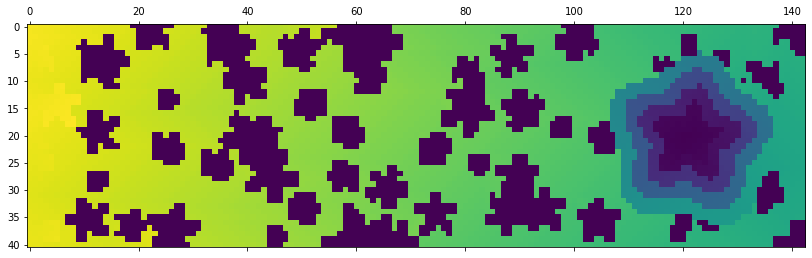

In [331]:
aa = min_steps.copy()
aa[aa==99999999999] = 0
plt.matshow(aa)